In [1]:
import submitit
import os
import glob
import numpy as np
import pandas as pd
import mne
import submitit
import mne
import numpy as np
from tensorpac import Pac
import matplotlib.pyplot as plt
import os
import urllib
import pandas as pd
import numpy as np
from scipy.io import loadmat

from tensorpac import Pac, EventRelatedPac, PreferredPhase
from tensorpac.utils import PeakLockedTF, PSD, ITC, BinAmplitude

In [3]:
pid = 'febb430e-2d50-4f83-87a0-b5ffbb9a4943'
epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'
epochs = mne.read_epochs(epoch_path, preload=True)
epochs = epochs.copy().pick_channels(['VISp6a_352'])

times = epochs.times
sf = epochs.info['sfreq']
meta = epochs.metadata.reset_index()
data = epochs.get_data().squeeze()
    

Reading /mnt/data/AdaptiveControl/IBLrawdata/pid_data/febb430e-2d50-4f83-87a0-b5ffbb9a4943/lfp_febb430e-2d50-4f83-87a0-b5ffbb9a4943_epoched.fif ...
Isotrak not found
    Found the data of interest:
        t =   -1000.00 ...    2000.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_388333/2745855421.py:3: RuntimeWarning: This filename (/mnt/data/AdaptiveControl/IBLrawdata/pid_data/febb430e-2d50-4f83-87a0-b5ffbb9a4943/lfp_febb430e-2d50-4f83-87a0-b5ffbb9a4943_epoched.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_path, preload=True)


Adding metadata with 16 columns
402 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_388333/2745855421.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data().squeeze()


In [4]:
p = EventRelatedPac(f_pha=[2, 8], f_amp=(25, 100, 3, 1))

# extract phases and amplitudes
pha = p.filter(sf, data, ftype='phase', n_jobs=5)
amp = p.filter(sf, data, ftype='amplitude', n_jobs=5)

erpac = p.fit(pha, amp, method='gc', smooth=20, n_jobs=5).squeeze()



Event Related PAC object defined
    Compute Gaussian-Copula ERPAC


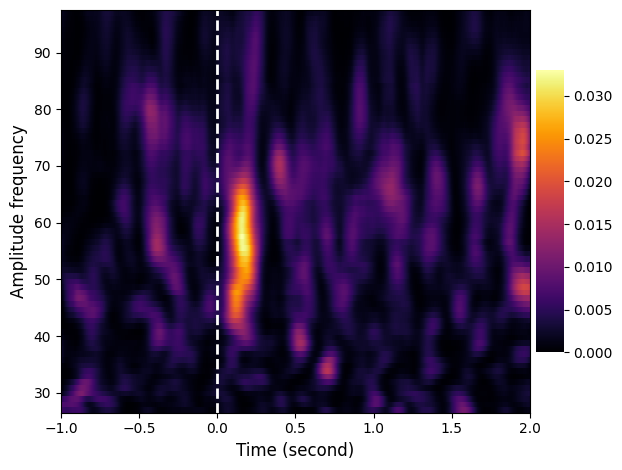

In [5]:

p.pacplot(erpac, times, p.yvec, xlabel='Time (second)', cmap='inferno', ylabel='Amplitude frequency')
plt.axvline(0, linestyle='--', color='w', linewidth=2)

plt.tight_layout()
p.show()

Phase Amplitude Coupling object defined
    extract phases (n_pha=60) and amplitudes (n_amps=75)
    true PAC estimation using Gaussian Copula PAC (gcPac)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 100 permutations, random_state=0)
WARNING | For inferences at p<0.05, it is recommended to perform at least n_perm=200 permutations
    infer p-values at (p=0.05, mcp=maxstat)
    normalize true PAC estimation by surrogates (Substract the mean of surrogates)
WARNING | 3d pac array has been given as an input. Only 2d arrays are supported for plotting. Taking the mean across the last dimension


<Axes: title={'center': 'after stim '}, xlabel='Frequency for phase (hz)', ylabel='Frequency for amplitude (hz)'>

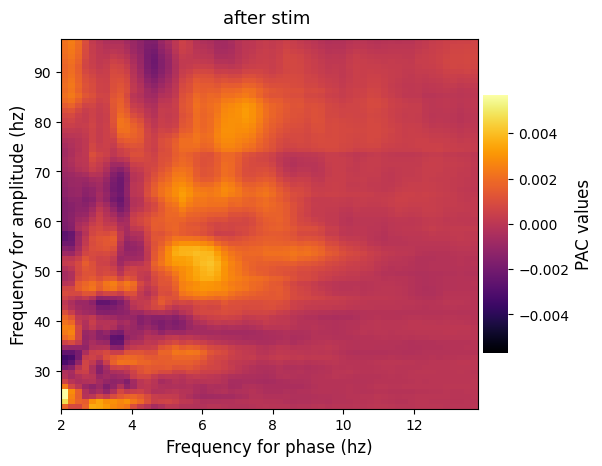

In [6]:
data_crop = data[ 500:1000]

p = Pac(idpac=(6, 2, 1), f_pha=(1, 15, 2, .2), f_amp=(20, 100, 5, 1))
# compute true pac and surrogates
n_perm = 60  # number of permutations
xpac = p.filterfit(sf, data, n_perm=100, n_jobs= 5, mcp= 'maxstat',
                   random_state=0).squeeze()
p.comodulogram(xpac, cmap='inferno' , title = f'after stim ')

In [7]:
phases = pha.squeeze()
phases_crop = phases[:, 500:1000]
phases_mean = np.mean(phases_crop, axis=1).squeeze() 

In [8]:
# Example vector of phases (in radians)
phases = phases_mean  # Replace with your 402 trial phases

# Step 1: Convert to complex representation
complex_phases = np.exp(1j * phases)

# Step 2: Compute the mean resultant vector
mean_vector = np.mean(complex_phases)

# Step 3: Calculate the Phase of Phase Coherence
PPC = np.angle(mean_vector)

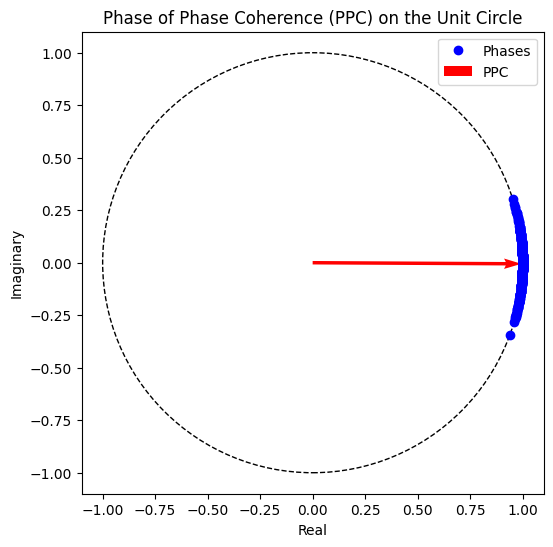

In [9]:
# Step 3: Plot the unit circle
plt.figure(figsize=(6,6))
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Step 4: Plot individual phase points
plt.plot(np.real(complex_phases), np.imag(complex_phases), 'bo', label='Phases')

# Step 5: Plot the mean resultant vector (PPC)
plt.quiver(0, 0, np.real(mean_vector), np.imag(mean_vector), angles='xy', scale_units='xy', scale=1, color='red', label='PPC')

# Set limits and aspect ratio
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')

# Add labels and legend
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Phase of Phase Coherence (PPC) on the Unit Circle')
plt.legend()

# Display the plot
plt.show()

Reading /mnt/data/AdaptiveControl/IBLrawdata/pid_data/febb430e-2d50-4f83-87a0-b5ffbb9a4943/lfp_febb430e-2d50-4f83-87a0-b5ffbb9a4943_epoched.fif ...
Isotrak not found
    Found the data of interest:
        t =   -1000.00 ...    2000.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_388333/577701846.py:3: RuntimeWarning: This filename (/mnt/data/AdaptiveControl/IBLrawdata/pid_data/febb430e-2d50-4f83-87a0-b5ffbb9a4943/lfp_febb430e-2d50-4f83-87a0-b5ffbb9a4943_epoched.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epoch_path, preload=True)


Adding metadata with 16 columns
402 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_388333/577701846.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data().squeeze()
Event Related PAC object defined


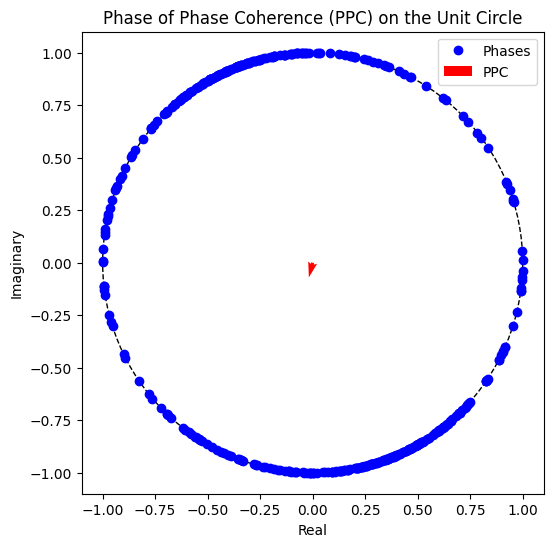

In [10]:
pid = 'febb430e-2d50-4f83-87a0-b5ffbb9a4943'
epoch_path = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/lfp_{pid}_epoched.fif'
epochs = mne.read_epochs(epoch_path, preload=True)
epochs = epochs.copy().pick_channels(['VISp6a_350'])

times = epochs.times
sf = epochs.info['sfreq']
meta = epochs.metadata.reset_index()
data = epochs.get_data().squeeze()
data = data[:, 500:1000]
p = EventRelatedPac(f_pha=[2, 8], f_amp=(25, 100, 3, 1))

# extract phases and amplitudes
pha = p.filter(sf, data, ftype='phase', n_jobs=5)

phases = pha.squeeze()
phases_mean = phases[:, 0 ]
# Step 1: Convert to complex representation
complex_phases = np.exp(1j * phases_mean)

# Step 2: Compute the mean resultant vector
mean_vector = np.mean(complex_phases)

# Step 3: Calculate the Phase of Phase Coherence
PPC = np.angle(mean_vector)


plt.figure(figsize=(6,6))
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Step 4: Plot individual phase points
plt.plot(np.real(complex_phases), np.imag(complex_phases), 'bo', label='Phases')

# Step 5: Plot the mean resultant vector (PPC)
plt.quiver(0, 0, np.real(mean_vector), np.imag(mean_vector), angles='xy', scale_units='xy', scale=1, color='red', label='PPC')

# Set limits and aspect ratio
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')

# Add labels and legend
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Phase of Phase Coherence (PPC) on the Unit Circle')
plt.legend()

# Display the plot